## 기본 세팅

In [1]:
import cv2
import numpy as np

In [2]:
src = cv2.imread('scale.jpg')

# 연습

## Image manipulation

In [2]:
canvas = np.zeros((300,300,3), dtype='uint8')
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255,255,255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white) # source, Center(X,Y), radius, color, thickness

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)


-1

In [6]:
# 남는 시간을 이용한 연습
src = np.zeros((1500,1500,3), dtype='uint8')
cv2.line(src, (100,100), (1200,700), (0,0,255), 3, cv2.LINE_4)
cv2.line(src, (100,115), (1200,715), (255,0,0), 3, cv2.LINE_8)
cv2.line(src, (100,130), (1200,730), (255,255,255), 3, cv2.LINE_AA)

cv2.circle(src, (300,300), 50, (0,255,0), cv2.FILLED, cv2.LINE_4)

cv2.rectangle(src, (500,200), (1000,400), (255,0,0), 5, cv2.LINE_8)

# cv2.ellipse(src, (1200,300))
cv2.imshow("Source", src)
cv2.waitKey(0)


-1

## Make Circle

In [3]:
for i in range(0, 25):
    radius = np.random.randint(5, high=200)
    color = np.random.randint(0, high=256, size = (3,)).tolist()
    pt = np.random.randint(0, high=300, size=(2,))
    
    cv2.circle(canvas, tuple(pt), radius, color, -1)

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

-1

## Move Image

In [6]:
"""
M 행렬 설명 
M.shape = ( 2 , 3 ) type = float(부동소수점)
첫번쨰 행 = [1,0,tx](x,y,변수) -tx = 좌, tx = 우 픽셀 이동
두번째 행 = [0,1, tx](x,y,변수)-tx = 위, tx = 아래 픽셀 이동
"""

image = cv2.imread('scale.jpg')
cv2.imshow("Original", image)

M = np.float32([[1,0,25], [0,1,50]]) # 우로 25, 아래로 50
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Down and Right", shifted)

M1 = np.float32([[1,0,-50], [0,1,-90]]) # 좌로 50, 위로 90
shifted1 = cv2.warpAffine(image, M1, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Up and Left", shifted1)
cv2.waitKey(0)

-1

In [8]:
def translate(image, x, y):
    """_summary_

    Args:
        image (_type_): img_source
        x (_type_): +x = Right, -x = Left 
        y (_type_): +y = Down, -y = Up

    Returns:
        _type_: moved image
    """
    M = np.float32([[1,0,x], [0,1,y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

cv2.imshow("tr", translate(image, 100, 100)) # 우 100, 하 100
cv2.imshow("tr2", translate(image, -100, -100)) # 좌 100, 상 100
cv2.waitKey(0)

-1

## Rotate

In [12]:
def rotate(image, angle, center=None, scale=1.0):
    """_summary_

    Args:
        image (_type_): Image source
        angle (_type_): Rotate angle
        center (_type_, optional): Image center. Defaults to None.
        scale (float, optional): Image Scale Up & Down. Defaults to 1.0.

    Returns:
        _type_: Rotated image
    """
    (height, width) = image.shape[:2]
    
    if center is None:
        center = (width // 2, height // 2)
        
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (width, height))
    
    return rotated

src = cv2.imread("scale.jpg")
cv2.imshow("Original", src)

rotated = cv2.imshow("Rotated Image", rotate(src, 45))
cv2.waitKey(0)

-1

## Resizing

In [11]:
src = cv2.imread("scale.jpg")
r = 400 / src.shape[0] # image.shape[0] = height, 최대 높이 기준으로 줄일 비율
print(r)
dim = (int(src.shape[1] * r), 300) # image.shape[1] = width, 800 = Absolute height

resized = cv2.resize(src, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("Resized(Height)", resized)
cv2.waitKey(0)


0.5925925925925926


-1

In [13]:
ratio = 0.5
dim = (int(src.shape[1]*r), int(src.shape[0]*r))

resized = cv2.resize(src, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("Resized(Height)", resized)
cv2.waitKey(0)

-1

In [2]:
def resize(image, ratio:float, interpolation=cv2.INTER_AREA):
    """
    _summary_

    Args:
        image (_type_): Image source
        ratio (float): Image resize ratio(X,Y total ratio)
        interpolation (_type_, optional): interpolation. Defaults to cv2.INTER_AREA.

    Returns:
        _type_: Resized Image
    """
    dim = (int(src.shape[1] * ratio), int(src.shape[0] * ratio))
    resized = cv2.resize(src, dim, interpolation)
    return resized

src = cv2.imread('scale.jpg')
resized_src = resize(src, 2)
cv2.imshow("Resized Image", resized_src)
cv2.waitKey(0)    

-1

## Flipping

In [5]:
src = cv2.imread('scale.jpg')

cv2.imshow("Original", src)

flipped = cv2.flip(src, 1) # 수평
cv2.imshow("Flipped Horizontally", flipped) 

flipped = cv2.flip(src, 0) # 수직
cv2.imshow("Flipped Vertically", flipped)

flipped = cv2.flip(src, -1) # 수평 + 수직
cv2.imshow("Flipped Horizontally & Vertically", flipped)
cv2.waitKey(0)

-1

## Cropping

In [6]:
cropped = src[30:120, 240:335]
cv2.imshow("Cropped", cropped)
cv2.waitKey(0)

-1

## Image operation

In [2]:
src = cv2.imread('scale.jpg')
# cv2.imshow("Original", src)
# cv2.waitKey(0)

print(f"max of 255 : {cv2.add(np.uint8([200]), np.uint8([100]))}")
print(f"min of 0 : {cv2.subtract(np.uint8([50]), np.uint8([100]))}")

print(f"wrap around : {np.uint8([200]) + np.uint8([100])}")
print(f"wrap around : {np.uint8([50]) - np.uint8([100])}")

max of 255 : [[255]]
min of 0 : [[0]]
wrap around : [44]
wrap around : [206]


In [7]:
"""
기존 값에 +가 되는 경우 = 색이 밝아짐
기존 값에 -가 되는 경우 = 색이 어두워짐

계산의 결과는 최소 0부터 최대 255까지만 가능하며 그 이상인 경우 최대 최소 값으로 고정
"""
M1 = np.ones(src.shape, dtype='uint8') * 100 # 1로 채운 뒤 100을 곱한다
added = cv2.add(src, M1) 
cv2.imshow("Added", added)

M2 = np.ones(src.shape, dtype='uint8') * 50
subtract = cv2.subtract(src, M2)
cv2.imshow("Subtract", subtract)
cv2.waitKey(0)

-1

## Bitwise operations

In [12]:
rectangle = np.zeros((300,300), dtype='uint8')
cv2.rectangle(rectangle, (25,25), (275,275), 255, -1) # source, start, end, colors, thickness
cv2.imshow('Rectangle', rectangle)

circle = np.zeros((300,300), dtype='uint8')
cv2.circle(circle, (150,150), 150, 255, -1) # source, zero-point, radius, colors, thickness
cv2.imshow('Circle', circle)
cv2.waitKey(0)

-1

In [15]:
# 교집합
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)

# 합집합
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)

# 같은 값을 가진 곳이 0(흑) 아니면 255(백)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)

# 반전
bitwiseNot = cv2.bitwise_not(circle)
cv2.imshow("NOT", bitwiseNot)
cv2.waitKey(0)


-1

## Masking 1

In [8]:
src = cv2.imread('scale.jpg')

In [3]:
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
print(gray_src.shape)
cv2.imshow("gray_src", gray_src)
cv2.waitKey(0)

(675, 1200)


-1

In [7]:
print(gray_src)

[[49 48 45 ... 51 53 54]
 [48 47 45 ... 51 52 53]
 [47 47 46 ... 52 52 53]
 ...
 [20 15 10 ...  8  8  8]
 [21 16 11 ...  8  8  9]
 [22 17 11 ...  7  9 10]]


In [8]:
cropped_circle = cv2.circle(gray_src, (250,250), 50, 255, -1)
print(cropped_circle.shape)
cv2.imshow("Crop Image", cropped_circle)
cv2.waitKey(0)

(675, 1200)


-1

In [11]:
bitwise_image = cv2.bitwise_or(gray_src, cropped_circle)
cv2.imshow("OR", bitwise_image)
cv2.waitKey(0)

-1

## Masking 2

In [3]:
src = cv2.imread('scale.jpg')

In [4]:
# rectangle masking
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(gray_src, dtype='uint8') # 소스 크기만큼의 검정 배경
(cX, cY) = (gray_src.shape[1] // 2, gray_src.shape[0] // 2) # 소스 크기 기준 영점 
cv2.rectangle(mask, (cX-75, cY-75), (cX+75, cY+75), 255, -1) # 영점 기준 정사각형
cv2.imshow("Mask", mask)
masked = cv2.bitwise_and(gray_src, gray_src, mask=mask)
cv2.imshow("Mask Applied to image.", masked)
cv2.waitKey(0)

-1

In [6]:
# circle masking
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(gray_src, dtype='uint8') # 소스 크기만큼의 검정 배경, 마스크는 1채널
(cX, cY) = (gray_src.shape[1] // 2, gray_src.shape[0] // 2) # 소스 크기 기준 영점 
cv2.circle(mask, (cX, cY), 300, 255, -1) # 영점 기준 원
# cv2.imshow("Mask", mask)
masked = cv2.bitwise_and(gray_src, gray_src, mask=mask)
cv2.imshow("Mask Applied to image.", masked)
cv2.waitKey(0)

-1

## 채널 분할 및 합병

In [5]:
src = cv2.imread('scale.jpg')
(B, G, R) = cv2.split(src)

cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

failure_merged = cv2.merge([R,G,B]) # 색 순서 변환
cv2.imshow("Merged", failure_merged)
cv2.waitKey(0)

merged = cv2.merge([B,G,R]) # 원래 색 순서
cv2.imshow("Merged", merged)
cv2.waitKey(0)

-1

In [6]:
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
zeros = np.zeros_like(gray_src, dtype='uint8') # 채널 주의
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)

-1

## Color spaces

In [5]:
cv2.imshow('Original', src)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
cv2.imshow("L * a * b*", lab)

cv2.waitKey(0)

-1

## Color histogram

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

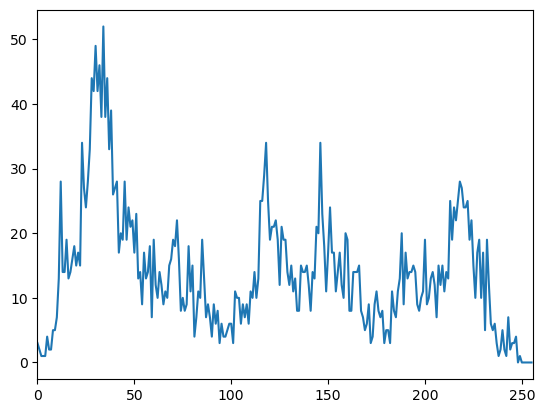

In [21]:
hist = cv2.calcHist(src, channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

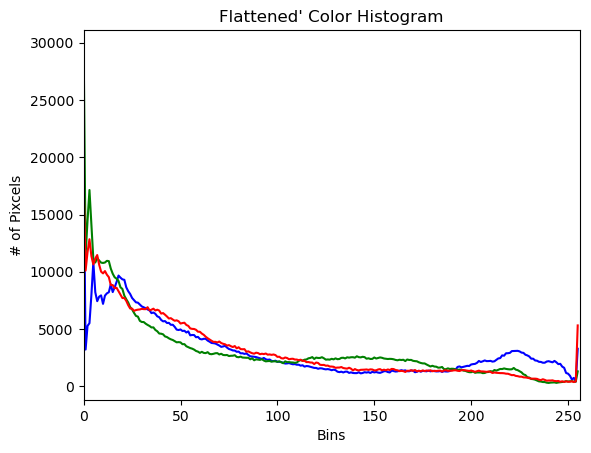

-1

In [24]:
channels = cv2.split(src)
colors = ('b','g','r')
plt.figure()
plt.title("Flattened' Color Histogram")
plt.xlabel('Bins')
plt.ylabel('# of Pixcels')

for (channel, color) in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])
plt.show()

cv2.imshow("Original", src)
cv2.waitKey(0)

2D histogram shape : (32, 32), with 1024 values


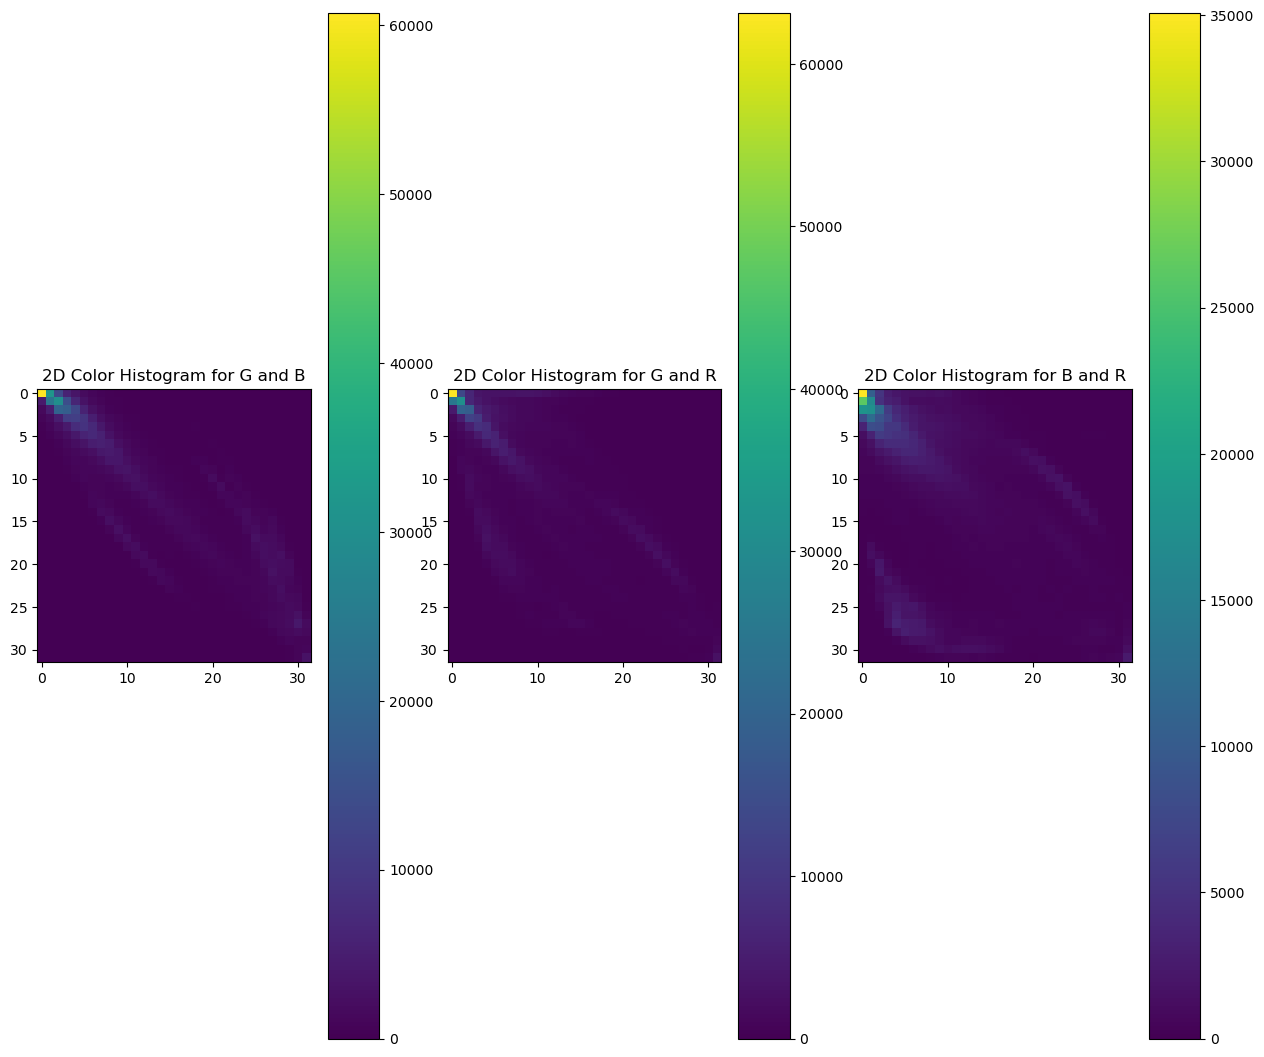

In [29]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(131)
hist = cv2.calcHist([channels[1], channels[0]], [0,1], None, [32,32], [0,256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([channels[1], channels[2]], [0,1], None, [32,32], [0,256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([channels[0], channels[2]], [0,1], None, [32,32], [0,256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

print(f"2D histogram shape : {hist.shape}, with {hist.flatten().shape[0]} values")

## 히스토그램 균등화

In [33]:
src = cv2.imread('night_street2.jpg')
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(gray_src)

cv2.imshow("Histogram Equalization", np.hstack([gray_src, eq]))
cv2.waitKey(0)

-1